#### Loan Prediction is a very common real life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of the retail bank.
    
 
Dream house fnance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict wether a loan should be approved or not.
Classification problem is of two types:
1. Binary Classification: In this classification we have to predict either of the two given classes. For example, predicting gender or predicting win or loss, etc.

2. Multiclass Classification : Here we have to classify the data into 3 more classes. For example, Classifying the movie's genre as romantic, comedy or action, etc.

Lets have an overlook at the steps that we will take in building the model for predicting wether a person should be given loan or not.

1. Loading the libraries and the data.
2. Understanding the data.
3. Exploratory Data Analysis (EDA)
    a) Univariate Analysis
    b) Bivariate Analysis
4. Missing Value and outlier detection/treatment.
5. Evaluation metrics for classification problem.
6. Model Building: PART 1
7. Logistic Regression using K-Fold cross validation.
8. Feature engineering.
9. Model Building: PART 2
    a) Logistic Regression
    b) Decision Tree
    c) Random Forest
    d)XGBoost
    
Lets look at each section in detail:

# Hypothesis

All those factors that can affect the outcome of prediction can be named as hypothesis.
It is one of the most important stage in any Data Science/Machine Learning pipleline.
It involves understanding the problem in detail and brainstorming as much factors as possible which can impact the outcome. 

In [307]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [309]:
train_original = train.copy()
test_original = test.copy()

In [310]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We got 12 independent variables and 1 dependent variable. Lets also look at the test data.

In [311]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [312]:
## Looking into the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We see a couple of null values. We will handle them later on.
Also the Loan_Status, our dependent variable is of Dtype Object. We will change it in 1's and 0's meaning,
1: Yes, Loan can be approved
0: No

In [313]:
## Shape of our data
train.shape, test.shape

((614, 13), (367, 12))

## Univariate Analysis
We need to look into each of the categorical columns to get a better understanding.

<AxesSubplot:>

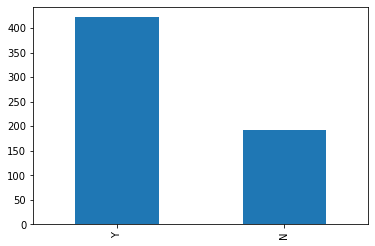

In [314]:
train['Loan_Status'].value_counts().plot.bar()

In [315]:
### setting normalize = True so as to print proportions instead of numbers

train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

The loan of 422(around 69%) people out of 614 was approved.
Now lets visualize each variable separately. 
Different types of variables are Categorical, ordinal and numerical.Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)Let’s visualize the categorical and ordinal features first.

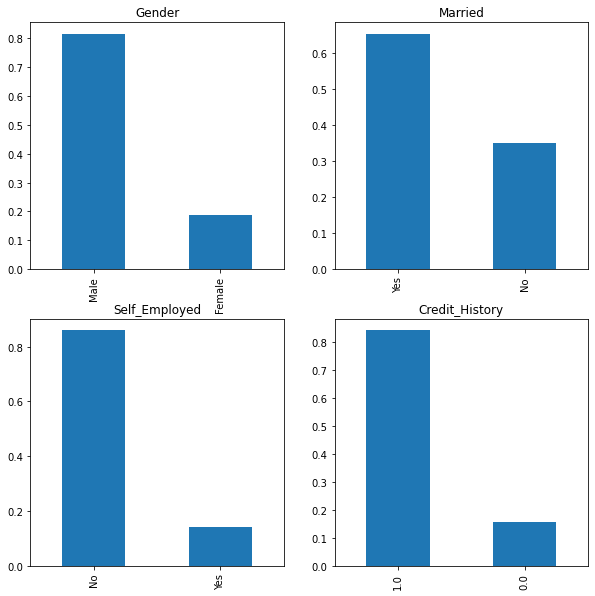

In [316]:
plt.figure()
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

It can be inferred from the above bar plots that:
1. 80% applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% applicants in the dataset are self employed.
4. Around 85% applicants have repaid their debts.


Now let’s visualize the ordinal variables.

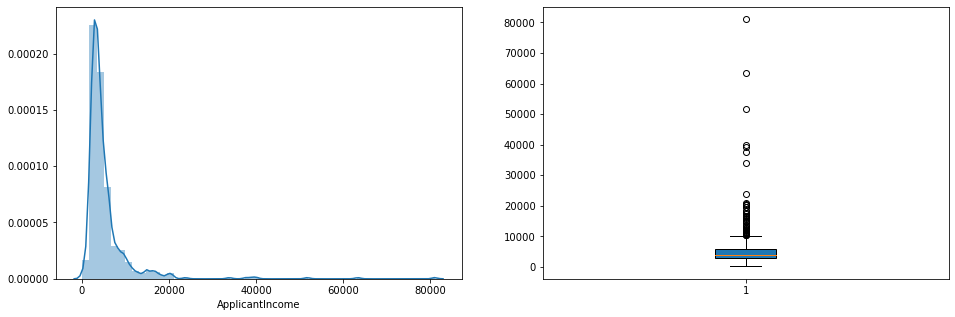

In [317]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
plt.boxplot(train['ApplicantIncome'], patch_artist = True)
plt.show()

It can be seen that the distribution of the data is completely on the left side.
Hence the data is not normally distributed. Too much xtreme values in the data resulted in a skewed distribution. The data needs to be cleaned before interpretation.

The boxplot confirms the presence of a lot of outliers/extreme values. 
This can be attributed to the income disparity in the society.
Part of this can be driven by the fact that we are looking at people with different education levels. 

Let us segregate them by Education:

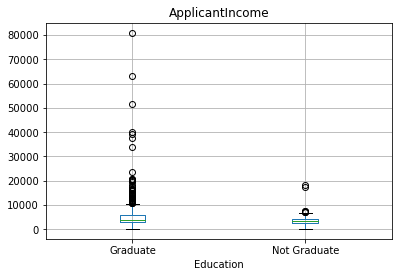

In [318]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("");

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.

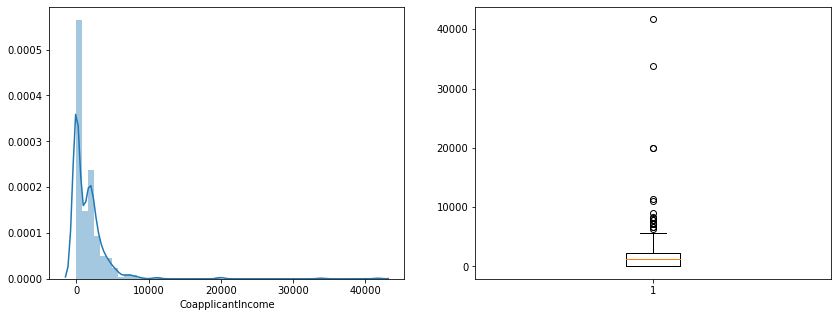

In [319]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.boxplot(train['CoapplicantIncome'])
plt.show()

We see a similar distribution as that of the applicant income. 
Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

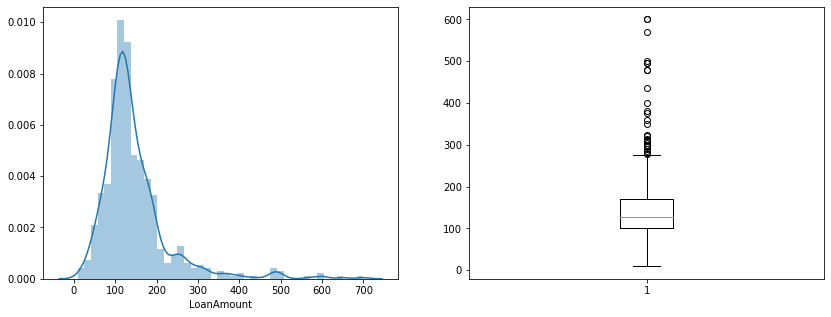

In [320]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(1,2,2)
plt.boxplot(df['LoanAmount']);

We see a lot of outliers in this variable and the distribution is fairly normal. 
We will treat the outliers in later sections.
Now we would like to know how well each feature correlate with Loan Status.

## Bivariate Analysis
In this section, we will see some of the correlations within the dataset between categoral and numerical columns nad their impact in the outcome.

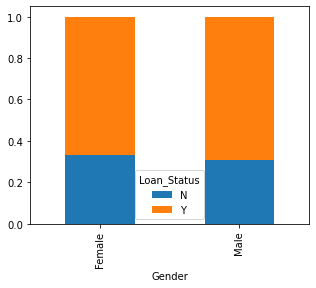

In [321]:
gender = pd.crosstab(train['Gender'], train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,4));

[]

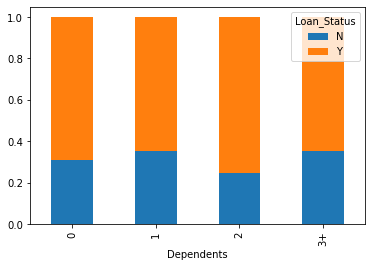

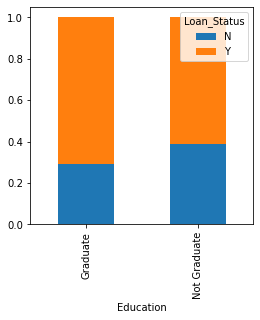

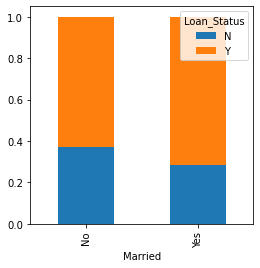

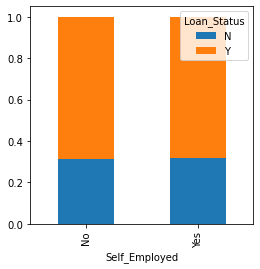

In [322]:
depend = pd.crosstab(train['Dependents'], train['Loan_Status'])
educate = pd.crosstab(train['Education'], train['Loan_Status'])
married = pd.crosstab(train['Married'], train['Loan_Status'])
employeed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

depend.div(depend.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize=  (6,4))
plt.plot()
educate.div(educate.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.plot()
married.div(married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.plot()
employeed.div(employeed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.plot()

<AxesSubplot:xlabel='Property_Area'>

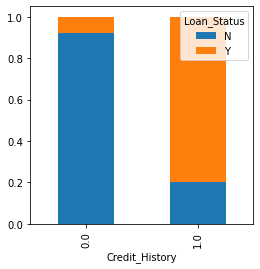

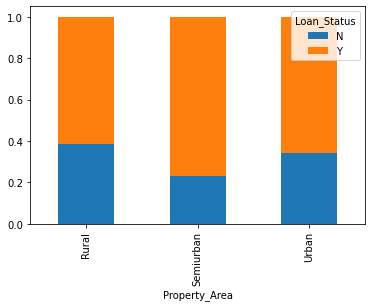

In [323]:
credit = pd.crosstab(train['Credit_History'], train['Loan_Status'])
property_area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
credit.div(credit.sum(1).astype(float), axis = 0).plot(kind=  'bar', stacked = True, figsize = (4,4))
plt.plot()
property_area.div(property_area.sum(1).astype(float), axis = 0).plot(kind=  'bar', stacked = True, figsize = (6,4))

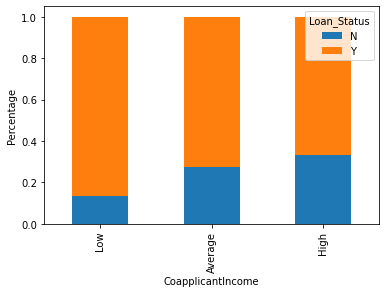

In [324]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

In [325]:
train.loc[train['ApplicantIncome'] < 2877.5, 'Status'] = 'Poor'
train.loc[(train['ApplicantIncome'] >= 2877.5) & (train['ApplicantIncome'] <= 5795.0), 'Status'] = 'Middle'
train.loc[train['ApplicantIncome'] > 5795, 'Status'] = 'Rich'

In [326]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_Income_bin,Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,Rich
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,Middle
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,Middle
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Poor
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,Rich


In [327]:
status = train.groupby(['Status', 'Loan_Status'])['ApplicantIncome'].mean().reset_index()
status

,Status,Loan_Status,ApplicantIncome
0,Middle,N,3990.852632
1,Middle,Y,3965.407583
2,Poor,N,2145.812500
3,Poor,Y,2257.500000
4,Rich,N,11500.346939
5,Rich,Y,11391.247619


In [328]:
train['Status'].unique()

array(['Rich', 'Middle', 'Poor'], dtype=object)

<BarContainer object of 614 artists>

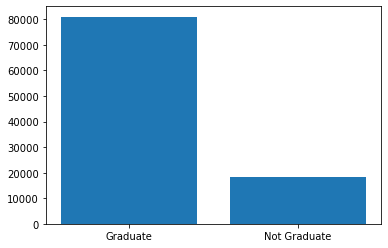

In [329]:
plt.bar(train['Education'],train['ApplicantIncome'])

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [330]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Coapplicant_Income_bin    273
Status                      0
dtype: int64

We can consider these methods to fill the missing values:For numerical variables: imputation using mean or medianFor categorical variables: imputation using mode

In [331]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [332]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [333]:
train.groupby(['Status', 'Loan_Status'])['Loan_Amount_Term'].mean().reset_index()

,Status,Loan_Status,Loan_Amount_Term
0,Middle,N,342.130435
1,Middle,Y,339.145631
2,Poor,N,340.434783
3,Poor,Y,351.923077
4,Rich,N,351.250000
5,Rich,Y,334.038462


In [334]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)

In [335]:
train.drop(['Coapplicant_Income_bin'], axis = 1, inplace = True)
train.drop('Loan_ID', axis = 1,inplace = True)
train.drop('Status', axis = 1, inplace  =True)

In [336]:
test.drop(['Loan_ID'], axis = 1, inplace = True)

In [337]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# OUTLIER TREATMENT

Outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. 
We must take steps to remove outliers from our data sets.
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 
This is called right skewness. One way to remove the skewness is by doing the log transformation. 

As we take the LOG TRANSFORMATION, it does not affect the smaller values much, but reduces the larger values. 
So, we get a distribution similar to normal distribution.Let’s visualize the effect of log transformation. 
We will do the similar changes to the test file simultaneously.

<AxesSubplot:>

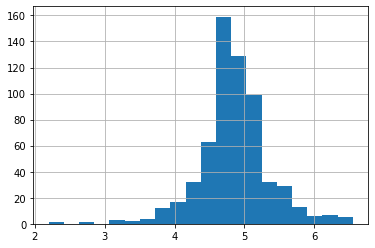

In [338]:
train['loan_amount_log'] = np.log(train['LoanAmount'])
test['loan_amount_log'] = np.log(test['LoanAmount'])

train['loan_amount_log'].hist(bins = 20)

In [339]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [340]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [342]:
X_train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
loan_amount_log            0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [343]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [344]:
y_pred = lr.predict(X_test)

In [345]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16 23]
 [ 1 83]]


0.8048780487804879

In [346]:
pred_test = lr.predict(test)

In [347]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [348]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [349]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [380]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic1.csv', index = False)

To check how robust our model is to unseen data, we can use Validation. 
It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. 
Later, you test your model on this sample before finalizing it. 


Some of the common methods for validation are listed below:
1. The validation set approach
2. k-fold cross validation
3. Leave one out cross validation (LOOCV)
4.Stratified k-fold cross validation